CS2006 Python Practical 2

Dataset gathered from: https://www.kaggle.com/artimous/complete-fifa-2017-player-dataset-global
The Dataset is the stats for each player and 50+ attricutes straight out of the video game FIFA 2017. 

The first requirment is to refine the data and below the many libraries needed to refine and perform analysis
on the data are imported.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patch
# from ipywidgets import *
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm
from operator import itemgetter

import pandas as pd
import numpy as np

from ipywidgets import widgets 
from IPython.display import display


Read in the csv file

In [7]:
low_memory = False
df = pd.read_csv("../Data/fifa_data.csv")

Check the types of each column in the CSV file

In [8]:
df.dtypes

Name                   object
Nationality            object
National_Position      object
National_Kit          float64
Club                   object
Club_Position          object
Club_Kit              float64
Club_Joining           object
Contract_Expiry       float64
Rating                  int64
Height                 object
Weight                 object
Preffered_Foot         object
Birth_Date             object
Age                     int64
Preffered_Position     object
Work_Rate              object
Weak_foot               int64
Skill_Moves             int64
Ball_Control            int64
Dribbling               int64
Marking                 int64
Sliding_Tackle          int64
Standing_Tackle         int64
Aggression              int64
Reactions               int64
Attacking_Position      int64
Interceptions           int64
Vision                  int64
Composure               int64
Crossing                int64
Short_Pass              int64
Long_Pass               int64
Accelerati

To begin really refining the data, the first thing done is remove any column with an empty value in it (NaN). This significanly reduces the size of the dataset in this particular case because the way data is provded by EA regarding players and their specefic stats. 

In [9]:
refinedData = df.copy()
refinedData = refinedData.dropna()
pd.options.display.float_format = '{:,.0f}'.format

Below duplicate rows are removed from the dataset. 

In [10]:
refinedData = refinedData.drop_duplicates()

Below the length of the new refined dataset is given below. As you can see it is a major pretty drop from over 17,000 to just over 1000. 

In [11]:
len(refinedData)

1075

In [12]:
len(df)

17588

Here arrays are defined as the only possible options for specefic columns and then there are nested for loops to check each value in the dataset matches one of the values in the predefined array. If the value is not in the array then then that row gets marked for removal and at the end of this block of code that there is loop that removes all of the rows that were marked for removal because they had invalid input in them. 

In [13]:
nationalPositions = ["CAM", "CB", "CDM", "CM", "GK", "LAM", "LB", "LCB", "LCM", "LDM", "LF", "LM", "LS", "LW", "LWB", "RAM", "RB", "RCB", "RCM", "RDM", "RF", "RM", "RS", "RW", "RWB", "ST", "Sub"]
clubPositions = ["CAM", "CB", "CDM", "CF", "CM", "GK", "LAM", "LB", "LCB", "LCM", "LDM", "LF", "LM", "LS", "LW", "LW", "RAM", "RB", "RCB", "RCM", "RDM", "RF", "RM" "RS", "RW", "RWB", "Res", "ST", "Sub"]   
contractDate = [2017, 2018, 2019, 2020, 2021, 2022, 2023]
prefferedFoot = ["Left", "Right"]
array100 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 
            48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 
            90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]

rowsToRemove = []
rCounter = 0

natPos = refinedData['National_Position']
for natPoCounter in natPos:
    flag = 1
    for nationalPositionCounter in nationalPositions:
                if nationalPositionCounter == natPoCounter:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1

rCounter = 0

clubPos = refinedData['Club_Position']
for clubPosCounter in clubPos:
    flag = 1
    for clubPositionCounter in clubPositions:
                if clubPositionCounter == clubPosCounter:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1

rCounter = 0

conDate = refinedData['Contract_Expiry']
for contractCounter in conDate:
    flag = 1
    for conDateCounter in contractDate:
                if conDateCounter == contractCounter:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1

rCounter = 0

prefFoot = refinedData['Preffered_Foot']
for prefFootCounter in prefFoot:
    flag = 1
    for footCounter in prefferedFoot:
                if footCounter == prefFootCounter:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1  
    
rCounter = 0

# no need to check each indivudal rating because if there was an error it would make the overall rating incorrect
# and thus get removed by this check instead - no need to right 36 more for loops
overAllRating = refinedData['Preffered_Foot']
for rateCounter in overAllRating:
    flag = 1
    for rateCount in array100:
                if rateCount == rateCounter:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1

# rCounter = 0

# rowsToRemove.sort(reverse=True)
# for i in rowsToRemove:
#     refinedData = refinedData.drop(refinedData.index[[i]])

refinedData.to_csv("refinedData.csv")

Here the national position data is shown with how many of each position is in the dataset. The same goes for the next few code blocks for Nationality, Club, Club Position, Contract Expiry, Rating, Height, Weight, Preffered Foot, Age, Work Rate, and Preffered Position. This is some of the data that goes on to be plotted using matplotlib. 

In [14]:
national_position = refinedData.groupby("National_Position")
national_position.size()

National_Position
CAM     19
CB       9
CDM      9
CM       9
GK      47
LAM      4
LB      39
LCB     48
LCM     25
LDM     19
LF       3
LM      32
LS      18
LW       7
LWB      4
RAM      4
RB      38
RCB     46
RCM     25
RDM     18
RF       3
RM      34
RS      18
RW       7
RWB      4
ST      30
Sub    556
dtype: int64

In [15]:
nationality = refinedData.groupby("Nationality")
nationality.size()

Nationality
Argentina              23
Australia              23
Austria                23
Belgium                23
Bolivia                22
Brazil                 23
Bulgaria               23
Cameroon               23
Canada                 23
Chile                  22
China PR               23
Colombia               24
Czech Republic         23
Denmark                23
Ecuador                22
Egypt                  23
England                23
Finland                20
France                 23
Germany                23
Greece                 24
Hungary                23
India                  24
Italy                  23
Ivory Coast            23
Mexico                 23
Netherlands            23
Northern Ireland       23
Norway                 23
Paraguay               24
Peru                   23
Poland                 23
Portugal               23
Republic of Ireland    23
Romania                21
Russia                 23
Scotland               23
Slovenia               23


In [16]:
club = refinedData.groupby("Club")
club.size()

Club
1. FC Köln              1
1. FC Nürnberg          2
1. FSV Mainz 05         2
1860 München            1
1899 Hoffenheim         4
AC Ajaccio              1
ADO Den Haag            1
AIK                     3
AS Monaco               8
AS Nancy                1
AS Saint-Étienne        2
AZ                      1
Aalborg BK              1
Aarhus GF               1
Aberdeen                1
Adelaide United         1
Ajax                    6
Akhisarspor             1
Al Ahli                 1
Al Ittihad              1
Al-Ettifaq              1
América                 2
Angers SCO              2
Antalyaspor             1
Arouca                  1
Arsenal                11
Arsenal Tula            1
Aston Villa             5
Atalanta                3
Atl. Nacional           3
                       ..
Terek Grozny            4
Tigres                  7
Toluca                  2
Tondela                 1
Torino                  4
Toronto FC              3
Toulouse FC             4
Trabzon

In [17]:
club_position = refinedData.groupby("Club_Position")
club_position.size()

Club_Position
CAM     31
CB       6
CDM     12
CF       1
CM       7
GK      80
LAM      3
LB      38
LCB     52
LCM     31
LDM     14
LF       2
LM      36
LS      12
LW      16
LWB      5
RAM      3
RB      44
RCB     49
RCM     23
RDM     16
RF       2
RM      27
RS      15
RW      18
RWB      4
Res    231
ST      41
Sub    256
dtype: int64

In [18]:
contract_expiry = refinedData.groupby("Contract_Expiry")
contract_expiry.size()

Contract_Expiry
2,017    101
2,018    224
2,019    240
2,020    242
2,021    145
2,022     59
2,023     64
dtype: int64

In [19]:
overall_rating = refinedData.groupby("Rating")
overall_rating.size()

Rating
52     2
53     2
54     2
55     3
56     1
57     1
58     8
59    10
60    11
61     8
62    11
63    18
64    14
65    23
66    25
67    37
68    28
69    41
70    47
71    56
72    57
73    71
74    71
75    60
76    65
77    57
78    50
79    47
80    45
81    37
82    38
83    49
84    17
85    13
86    16
87     7
88    11
89     8
90     3
92     3
93     1
94     1
dtype: int64

In [20]:
height = refinedData.groupby("Height")
height.size()

Height
160 cm     1
162 cm     1
163 cm     1
164 cm     2
165 cm     4
166 cm     2
167 cm     3
168 cm    12
169 cm    13
170 cm    32
171 cm    16
172 cm    16
173 cm    32
174 cm    29
175 cm    53
176 cm    36
177 cm    24
178 cm    61
179 cm    42
180 cm    77
181 cm    31
182 cm    45
183 cm    70
184 cm    56
185 cm    62
186 cm    39
187 cm    48
188 cm    67
189 cm    37
190 cm    47
191 cm    23
192 cm    24
193 cm    29
194 cm     7
195 cm     9
196 cm    14
197 cm     3
198 cm     3
199 cm     2
201 cm     1
203 cm     1
dtype: int64

In [21]:
weight = refinedData.groupby("Weight")
weight.size()

Weight
55 kg     1
58 kg     2
59 kg     3
60 kg     6
61 kg     4
62 kg     7
63 kg     5
64 kg    12
65 kg    11
66 kg    20
67 kg    27
68 kg    38
69 kg    21
70 kg    80
71 kg    40
72 kg    46
73 kg    46
74 kg    61
75 kg    71
76 kg    56
77 kg    47
78 kg    58
79 kg    42
80 kg    44
81 kg    32
82 kg    44
83 kg    34
84 kg    35
85 kg    44
86 kg    30
87 kg    17
88 kg    23
89 kg    10
90 kg    15
91 kg    15
92 kg    11
93 kg     6
94 kg     1
95 kg     5
96 kg     2
97 kg     2
98 kg     1
dtype: int64

In [22]:
foot = refinedData.groupby("Preffered_Foot")
foot.size()

Preffered_Foot
Left     235
Right    840
dtype: int64

In [23]:
age = refinedData.groupby("Age")
age.size()

Age
17      1
18      4
19     17
20     16
21     32
22     66
23     77
24     97
25    103
26     91
27    111
28     94
29     92
30     87
31     61
32     51
33     30
34     14
35     11
36      3
37     10
38      3
39      3
44      1
dtype: int64

In [24]:
work_rate = refinedData.groupby("Work_Rate")
work_rate.size()

Work_Rate
High / High        121
High / Low          52
High / Medium      237
Low / High          25
Low / Low            1
Low / Medium        21
Medium / High      125
Medium / Low        41
Medium / Medium    452
dtype: int64

In [25]:
pref_position = refinedData.groupby("Preffered_Position")
pref_position.size()

Preffered_Position
CAM           12
CAM/CF         4
CAM/CM        12
CAM/LM        12
CAM/LM/CM      1
CAM/LM/RM      2
CAM/LW         4
CAM/RM         7
CAM/RM/LM      1
CAM/RW         5
CAM/ST         4
CB           145
CB/CDM        13
CB/CM          2
CB/LB         15
CB/RB         18
CDM           27
CDM/CAM        3
CDM/CB         7
CDM/CM        46
CDM/LM         1
CDM/RB         3
CDM/RM         1
CF/CAM         1
CF/CAM/ST      1
CF/RM          1
CM            19
CM/CAM        16
CM/CB          1
CM/CDM        53
            ... 
RM/CAM        10
RM/CF          1
RM/CM          2
RM/CM/CDM      1
RM/LM         18
RM/LW          1
RM/LW/LM       1
RM/RB          1
RM/RW          4
RM/RWB         1
RM/ST          6
RW             5
RW/CAM         3
RW/CF          1
RW/CM/LW       1
RW/LM          1
RW/LW          6
RW/RB          2
RW/RM          2
RW/ST          2
RWB/RM         1
ST           100
ST/CAM         8
ST/CF          4
ST/LM         16
ST/LW          9
ST/RM       

Below is a bar graph of the National Position data and as you can see the majority of the players in the FIFA 2017 game are subs for their respective national teams. 

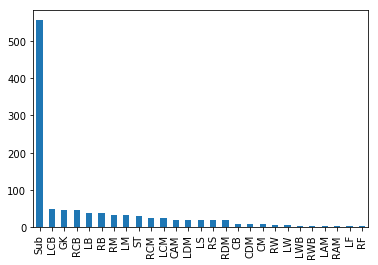

In [26]:
refinedData['National_Position'].value_counts().plot(kind="bar")
plt.show()

Below is a pie chart of the nationalities represented in the game and as you can see it is a pretty even distrbution of players from each country. 

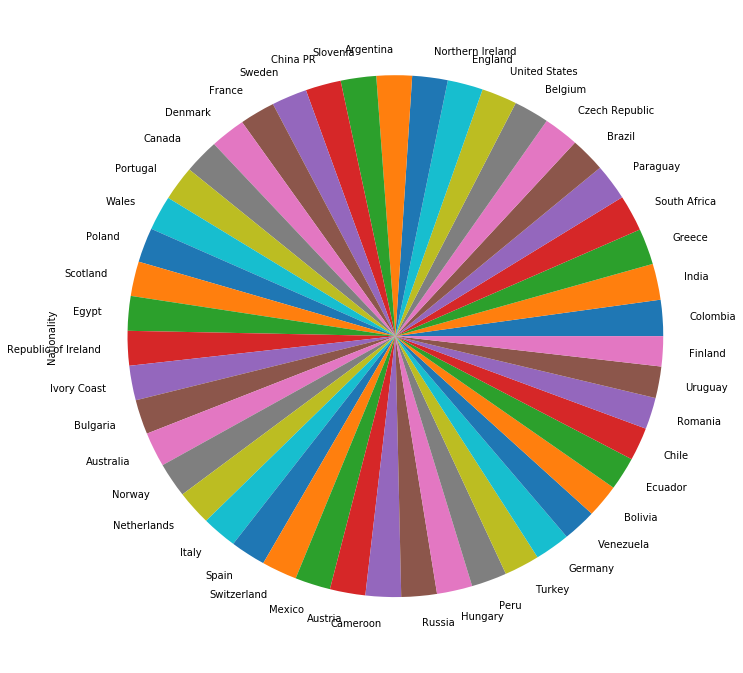

In [27]:
refinedData['Nationality'].value_counts().plot(kind="pie", figsize = (12,12))
plt.show()

Below is a bar char showing the distribution of work rates among players. The work rate stat in FIFA 17 describes a players leaning towards offense of defense and as such high/medium means high offense skills/medium deffense skills. 

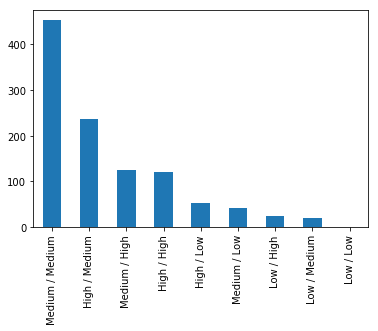

In [28]:
refinedData['Work_Rate'].value_counts().plot(kind="bar")
plt.show()

Below is the distribution of club positions among players and as is simmilar to the national position data the majority of players in FIFA are substitutes. 

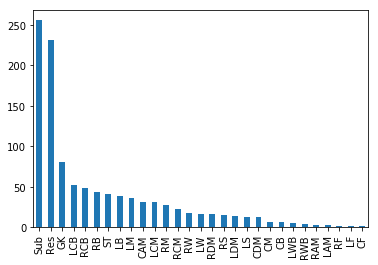

In [29]:
refinedData['Club_Position'].value_counts().plot(kind="bar")
plt.show()

Below is the data that shows how many players have their contract epxiery date in each each in the future and with the players in FIFA17 the majoirty of them have contracts that expire in 2020 but almost the same amount have contracts that expire in 2019 or 2018. 

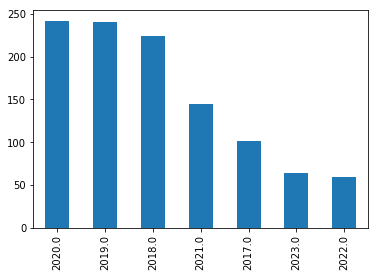

In [30]:
refinedData['Contract_Expiry'].value_counts().plot(kind="bar")
plt.show()

Below is a bar chart showing the distrubiton of rating among the different players. The "Rating" stat in FIFA is based of the over 30 indivudual ratings also in the dataset. Each rating beit the overall Rating or a rating specefic skill is on a scale of 1 - 100 where the higher number means the player is either better overall or better at the specefic skill. 

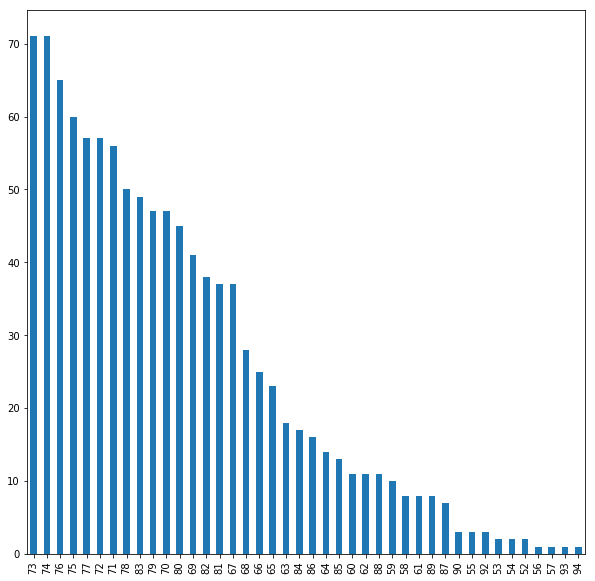

In [31]:
refinedData['Rating'].value_counts().plot(kind="bar", figsize = (10, 10))
plt.show()

Below is the age distribution and as you can see there are more 27 year olds than any other age but not by a wide margin. 

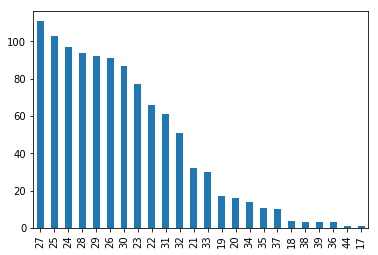

In [32]:
refinedData['Age'].value_counts().plot(kind="bar")
plt.show()

Below is a pie chart showing the distribution between right dominated foot players and left. There is a clear majority of righties than lefties which is not a total surprise as there are more righties in the world as a whole. 

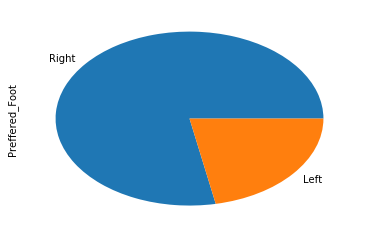

In [33]:
refinedData['Preffered_Foot'].value_counts().plot(kind="pie")
plt.show()

Below is a table produced by using groupBy which shows how many righties and lefties play at each position when they are playing for their national teams. 

In [34]:
byPositionAndFoot = refinedData[['National_Position', 'Preffered_Foot']].copy()
byPositionAndFoot = byPositionAndFoot.groupby(['National_Position', 'Preffered_Foot']).size()
byPositionAndFoot.reset_index(name='Count')

,National_Position,Preffered_Foot,Count
0,CAM,Left,7
1,CAM,Right,12
2,CB,Left,1
3,CB,Right,8
4,CDM,Left,1
5,CDM,Right,8
6,CM,Left,1
7,CM,Right,8
8,GK,Left,4
9,GK,Right,43


Below is a table produced by using groupBy which shows how many righties and lefties play at each position when they are playing for their national teams. 

In [35]:
byClubPositionAndFoot = refinedData[['Club_Position', 'Preffered_Foot']].copy()
byClubPositionAndFoot = byClubPositionAndFoot.groupby(['Club_Position', 'Preffered_Foot']).size()
byClubPositionAndFoot.reset_index(name='Count')

,Club_Position,Preffered_Foot,Count
0,CAM,Left,8
1,CAM,Right,23
2,CB,Left,1
3,CB,Right,5
4,CDM,Left,3
5,CDM,Right,9
6,CF,Right,1
7,CM,Left,1
8,CM,Right,6
9,GK,Left,9


Below is a table produced using groupBy that shows the correleation between height and overall rating. This produces a lot of table entries because the height stat in the dataSet is an exact figure so even a player is a cm different from another than there is a whole new row in the table. In the future possbily refining the height stat in this dataset to produce the height stat as a few ranges of height might yeild better results in this table. 

In [36]:
# height with overall rating
byHeightAndRating = refinedData[['Height', 'Rating']].copy()
byHeightAndRating = byHeightAndRating.groupby(['Height', 'Rating']).size()
byHeightAndRating.reset_index(name='Count')

,Height,Rating,Count
0,160 cm,64,1
1,162 cm,71,1
2,163 cm,84,1
3,164 cm,65,1
4,164 cm,72,1
5,165 cm,66,1
6,165 cm,68,1
7,165 cm,71,1
8,165 cm,86,1
9,166 cm,61,1


Below is a table produced using groupBy that shows the correleation between weight and overall rating. This produces a lot of table entries because the weight stat in the dataSet is an exact figure so even a player is a kg different from another than there is a whole new row in the table. In the future possbily refining the weight stat in this dataset to produce the weight stat as a few ranges of weight like suggested for the height stat might yeild better results in this table.

In [37]:
# weight with overall rating
byWeightAndRating = refinedData[['Weight', 'Rating']].copy()
byWeightAndRating = byWeightAndRating.groupby(['Weight', 'Rating']).size()
byWeightAndRating.reset_index(name='Count')

,Weight,Rating,Count
0,55 kg,64,1
1,58 kg,62,1
2,58 kg,80,1
3,59 kg,68,1
4,59 kg,73,1
5,59 kg,84,1
6,60 kg,65,1
7,60 kg,71,1
8,60 kg,72,1
9,60 kg,73,1


Below is table produced using groupBy that shows the correlation between age and rating and from looking at is looks like the majority of the high ratings reside in the middle of the age range. 

In [38]:
byAgeAndRating = refinedData[['Age', 'Rating']].copy()
byAgeAndRating = byAgeAndRating.groupby(['Age', 'Rating']).size()
byAgeAndRating.reset_index(name='Count')

,Age,Rating,Count
0,17,63,1
1,18,62,1
2,18,75,1
3,18,77,1
4,18,79,1
5,19,53,1
6,19,54,1
7,19,62,1
8,19,64,2
9,19,65,1


Below is a 3D graph of the table showing the relationship between national position and preffered foot. The x axis is the national position, the y axis is the preffered foot stat, and finally the z axis is the the count when these two variables intersect. 

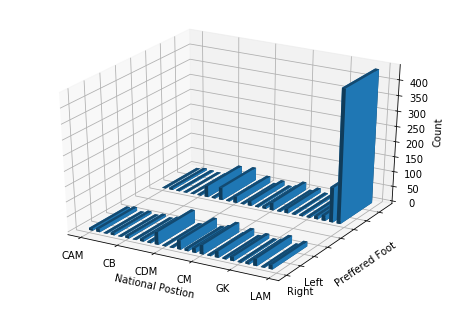

In [39]:
# national position and preffered foot - 3d graph 
national_position_array = ["CAM", "CB", "CDM", "CM", "GK", "LAM", "LB", "LCB", "LCM", "LDM", "LF", "LM", "LS", "LW", "LWB", "RAM", "RB", "RCB", "RCM", "RDM", "RF", "RM", "RS", "RW", "RWB"]
preffered_foot_array = ["Right", "Left"]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax = Axes3D(fig)
ax.set_xlabel("National Postion")
ax.set_ylabel("Preffered Foot")
ax.set_zlabel("Count")

byPositionAndFoot = refinedData[['National_Position', 'Preffered_Foot']].copy()
byPositionAndFoot = byPositionAndFoot.groupby(['National_Position', 'Preffered_Foot'])

z = byPositionAndFoot.size().tolist()
axes = byPositionAndFoot.groups.keys()
axes = sorted(axes, key=itemgetter(1))
axes = sorted(axes, key=itemgetter(0))

x = list(range(0, len(national_position_array)))
y = list(range(0, len(preffered_foot_array)))
X, Y = np.meshgrid(x,y)
zs = np.array(z)
Z = zs.reshape(Y.shape)

values = np.linspace(0.2,1.,X.ravel().shape[0])
colours = plt.cm.Spectral(values)

ax.bar3d(X.ravel(), Y.ravel(), Z.ravel()*0, dx=0.5, dy=0.5, dz=Z.ravel())

ax.set_xticklabels(np.array(national_position_array))
ax.set_yticklabels(np.array(preffered_foot_array))

plt.show()

Below is a 3D graph showing the relationship between preffered foot and position just like the above chart but in this case club positions are looked at instead of national positions. This was done not only because it is good to compare between national positions and club positions but as well as you can see in the national positions chart, most players are substitutes which is not the case for the club positions. As you can see the distribution of players among different positions and not just the substitue role is much greater in this chart. This can espcially be seen with the center defense midfielder position where there are many more players that play that position for their club team and not their national team. 

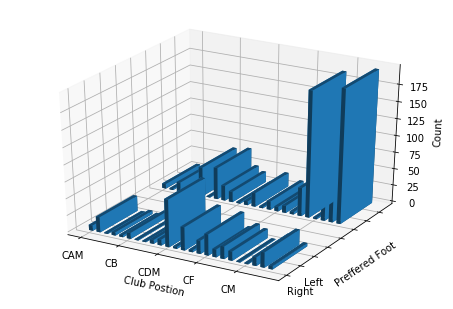

In [40]:
# club position and foot
club_position_array = ['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS']
foot_array = ["Right", "Left"]


fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax = Axes3D(fig)
ax.set_xlabel("Club Postion")
ax.set_ylabel("Preffered Foot")
ax.set_zlabel("Count")

byClubPositionAndFoot = refinedData[['Club_Position', 'Preffered_Foot']].copy()
byClubPositionAndFoot = byClubPositionAndFoot.groupby(['Club_Position', 'Preffered_Foot'])

z = byClubPositionAndFoot.size().tolist()
axes = byPositionAndFoot.groups.keys()
axes = sorted(axes, key=itemgetter(1))
axes = sorted(axes, key=itemgetter(0))

x = list(range(0, len(club_position_array)))
y = list(range(0, len(foot_array)))

X, Y = np.meshgrid(x,y)
# len(national_position_array)
zs = np.array(z)
# print(X)
# print(Y)
Z = zs.reshape(Y.shape)

values = np.linspace(0.2,1.,X.ravel().shape[0])
colours = plt.cm.Spectral(values)

ax.bar3d(X.ravel(), Y.ravel(), Z.ravel()*0, dx=0.5, dy=0.5, dz=Z.ravel())

ax.set_xticklabels(np.array(club_position_array))
ax.set_yticklabels(np.array(foot_array))

plt.show()

Below is a widget using ipywdigets that allows you to selected a specefic player and see all of there stats and other data that pertains to them like which team they play for and their position. 

In [58]:
def update (Player = list(refinedData['Name'].unique())):
    rating = refinedData[(refinedData['Name'] == Player)]
    display(rating)

interact(update);

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7,Real Madrid,LW,7,07/01/2009,"2,021",94,...,90,81,76,85,88,14,7,15,11,11
